# Stationære punkter med SymPy 
I denne notebook vil vi vise, hvordan man kan bruge SymPy til at finde stationære punkter for funktioner af to variable. Formålet er at checke beregninger udført i hånden (især relevant til pointopgaver og den skriftlige eksamen). I begge tilfælde giver der ikke point for en SymPy-løsning alene, med det kan være en hjælp til at afsløre regnefejl og sikre at man har fundet alle de steder hvor gradienten er nul.

Til at starte med importerer vi sympy og de variable $x$ og $y$. 

In [2]:
import sympy as sp
from sympy.abc import x, y

Vi definerer nu en funktion og laver et hurtigt plot. Så kan vi nemlig senere sammenligne med resultatet. 

(-y**2 + 2*y)*(2*x**2 - x - 2)

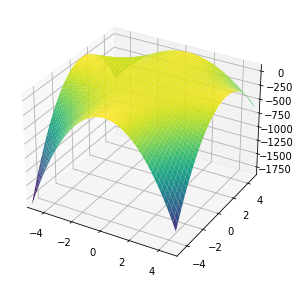

In [3]:
f = (2 * x ** 2 - x - 2) * (- y ** 2 + 2 * y)

display(f)

from sympy.plotting import plot3d

plot3d(f, (x, -5, 5), (y, -5, 5));

Vi vil nu udregne gradienten. For at gøre dette i SymPy benytter vi `sp.derive_by_array()`, hvor vi så specificerer, at vi ønsker at differentiere i forhold til $x$ og $y$. 

In [4]:
grad = sp.derive_by_array(f, (x, y))
grad

[(4*x - 1)*(-y**2 + 2*y), (2 - 2*y)*(2*x**2 - x - 2)]

De stationære punkter findes dér, hvor gradienten er nul, altså for de $(x, y)$ hvor _begge_ ovenstående udtryk er nul. Vi vil nu løse $\left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right] = [0, 0]$ (som jo er 2 ligninger med 3 ubekendte) med `sp.solve()`. Bemærk her den meget korte notation, der skyldes at vi sætter begge udtryk i `grad` lig med 0. Ville vi have løst $\left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right] = [a, b]$ kunne vi have specificeret det ved at skrive
```python
ligninger = [sp.Eq(grad[0], a), sp.Eq(grad[1], b)]
sp.solve(ligninger)
```
Men igen: da begge udtryk sættes lig med 0, kan vi skrive:

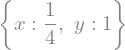

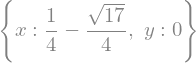

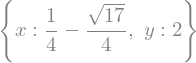

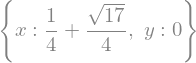

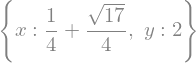

In [5]:
sp.init_printing() # Init printing hjælper med at visualisere udtryk, når vi får flere fra en ligning

solutions = sp.solve(grad)
display(*solutions)

Vi får her et såkaldt "dictionairy" for hver løsning. Vi kan finde de enkelte løsninger ved at skrive `solutions[løsnings_nummer][variabel]`. x-variablen fra den anden løsning findes altså som:

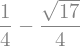

In [6]:
solutions[1][x]  # Husk at Python indekserer fra nul så løsnings_nummer 1 svarer til det andet element.

Til sidst kan vi benytte matplotlib til at tegne udtrykkene i et (x,y)-plan. Vi går her bare igennem listen og plotter hhv. x og y variablen

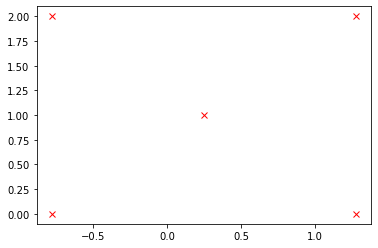

In [7]:
import matplotlib.pyplot as plt

plt.figure()
for sol in solutions:
    plt.plot(sol[x], sol[y], "rx")

# Stabilitet af stationære punkter
Vi kan også benytte ABC-kriteriet for at undersøge de stationære punkters stabilitet. Først laver vi udregningerne for det første stationære punkt:

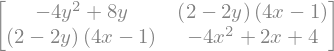

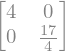

In [16]:
from sympy.matrices import hessian
sol = solutions[0]    # Vi vælger det første ... man kan selvfølgelig også vælge et af de andre stationære punkter.
H = hessian(f, [x, y])

display(H)

# Indsæt værdien for x og y fra solutions:
H = H.subs(x, sol[x]).subs(y, sol[y])
display(H)

In [17]:
# Nu regner vi blot A og D værdien
D = sp.det(H)
A = H[0, 0]

print(f"A = {A}, D = {D}")

# Vi laver en samling af if/else statements til at tjekke fortegn på vores værdier:
if D < 0:
    print("Saddelpunkt")
elif D > 0:
    if A > 0:
        print("Minimum")
    elif A < 0:
        print("Maximum")
else:
    print("Ikke nok information")



A = 4, D = 17
Minimum


Når der er flere stationære punker, kan man køre dem igennem ovenstående en for en ... eller vi kan lave en løkke, der løber igennem alle de stationære punkter:

In [20]:
from sympy.matrices import hessian
H = hessian(f, [x, y])

# Løkke over alle vores løsninger
for sol in solutions:
    
    # Indsæt x- og y-værdierne i H:
    H_eval = H.subs(x, sol[x]).subs(y, sol[y])

    # Udregn A og D
    D = sp.det(H_eval)
    A = H_eval[0, 0]

    print(f"Stationært punkt med x = {sol[x]} og y = {sol[y]}")
    print(f"A = {A}, D = {D}")

    # Tjek om det er minimum eller maksimum
    if D < 0:
        print("Saddelpunkt")
    elif D > 0:
        if A > 0:
            print("Minimum")
        elif A < 0:
            print("Maximum")
    else:
        print("Ikke nok information")
    print("---")

    

Stationært punkt med x = 1/4 og y = 1
A = 4, D = 17
Minimum
---
Stationært punkt med x = 1/4 - sqrt(17)/4 og y = 0
A = 0, D = -68
Saddelpunkt
---
Stationært punkt med x = 1/4 - sqrt(17)/4 og y = 2
A = 0, D = -68
Saddelpunkt
---
Stationært punkt med x = 1/4 + sqrt(17)/4 og y = 0
A = 0, D = -68
Saddelpunkt
---
Stationært punkt med x = 1/4 + sqrt(17)/4 og y = 2
A = 0, D = -68
Saddelpunkt
---
